In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#why would I want to pass variables using a class (structure) rather than without it?

class param:
    C_1 = 1
    U_B = 1
    H_R = 1
    S_0 = 0.5
    C_2 = 1
    C_3 = 1
    PHI_0 = 8
    ALPHA = 5/4
    V_P = 5
    Q_IN = 1000 # eventually also function of time
    MAX_Q_IN = 100 # eventually this will be a function of temp
    MIN_Q_IN = 3 # same here ^^
    N_MAX = 40
    L = 40
    
print(param.C_1)

1


In [44]:
%run q_s.ipynb

In [47]:
def glof_odes(x, t, param):

    # assign each ODE to a vector element
    S = x[0]
    N = x[1]
    
    #define inside functions:

    phi = param.PHI_0 - N/param.L
    
    n = 3
    q = param.C_3*(S**param.ALPHA)*(abs(phi)**-0.5)*phi
    v_0 = param.U_B*param.H_R*(1-S/param.S_0)
    v_c = param.C_2*S*(abs(N)**(n-1))*N
    
    # define each ODE
    dSdt = param.C_1*q_s(N, q, param)*phi + v_0 - v_c
    dNdt = (-1/param.V_P)*(param.Q_IN - q_s(N, q, param))

    return [dSdt, dNdt]

x0 = [param.S_0,5]
t0 = 0

print(glof_odes(x0,t0,param))

[-62.5, -200.0]


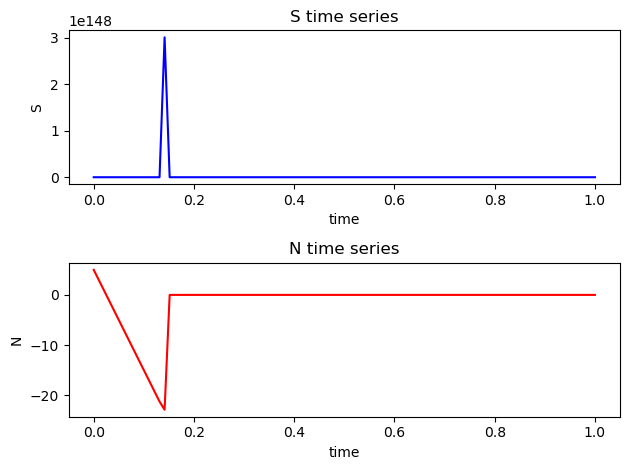

In [46]:
#plotting on two separate plots

t = np.linspace(0,1,100)
x = odeint(glof_odes,x0,t,args = (param,)) #anonymous fnc in matlab, to pass param with glof_odes in another fnc to use in odeint
#what odeint likes for passing parameters, what other arguments it takes

S = x[:,0]
N = x[:,1]

plt.subplot(2,1,1)
plt.plot(t, S, color="blue")
plt.ylabel("S")
plt.xlabel("time")
plt.title("S time series")

plt.subplot(2,1,2)
plt.plot(t, N, color = "red")
plt.ylabel("N")
plt.xlabel("time")
plt.title("N time series")

plt.tight_layout()
